In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression as LR

In [3]:
x = np.array(np.arange(-20, 20, 0.5))
x


array([-20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5, -16. ,
       -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5,
       -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,
        -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,
        -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,
         2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,
         7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,
        11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,
        16. ,  16.5,  17. ,  17.5,  18. ,  18.5,  19. ,  19.5])

In [16]:
y = 1/ (1+np.exp(-x))
y

array([2.06115362e-09, 3.39826781e-09, 5.60279641e-09, 9.23744958e-09,
       1.52299795e-08, 2.51099909e-08, 4.13993755e-08, 6.82560291e-08,
       1.12535162e-07, 1.85539102e-07, 3.05902227e-07, 5.04347408e-07,
       8.31528028e-07, 1.37095721e-06, 2.26032430e-06, 3.72663928e-06,
       6.14417460e-06, 1.01299910e-05, 1.67014218e-05, 2.75356911e-05,
       4.53978687e-05, 7.48462275e-05, 1.23394576e-04, 2.03426978e-04,
       3.35350130e-04, 5.52778637e-04, 9.11051194e-04, 1.50118226e-03,
       2.47262316e-03, 4.07013772e-03, 6.69285092e-03, 1.09869426e-02,
       1.79862100e-02, 2.93122308e-02, 4.74258732e-02, 7.58581800e-02,
       1.19202922e-01, 1.82425524e-01, 2.68941421e-01, 3.77540669e-01,
       5.00000000e-01, 6.22459331e-01, 7.31058579e-01, 8.17574476e-01,
       8.80797078e-01, 9.24141820e-01, 9.52574127e-01, 9.70687769e-01,
       9.82013790e-01, 9.89013057e-01, 9.93307149e-01, 9.95929862e-01,
       9.97527377e-01, 9.98498818e-01, 9.99088949e-01, 9.99447221e-01,
      

Text(0.5, 1.0, 'Logistic regression')

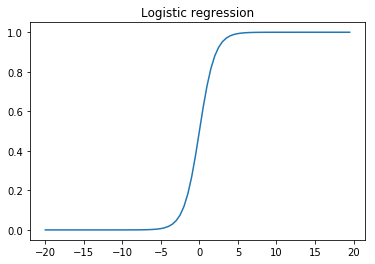

In [30]:
a = plt.plot(x, y)
plt.title('Logistic regression')

In [19]:
%matplotlib inline

In [88]:
df = pd.read_csv('./Lecture_12_02/bank-full.csv', sep=';')

In [89]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [90]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [91]:
df.apply(lambda x: sum(x == 'unknown'), axis=0)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [92]:
df.drop(['contact', 'poutcome'], axis=1, inplace=True )

In [93]:
df.apply(lambda x: sum(x == 'unknown'), axis=0)

age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
y               0
dtype: int64

In [94]:
df = df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]

In [95]:
df.apply(lambda x: sum(x == 'unknown'), axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [104]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,2,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,1,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,76,1,-1,0,0
5,35,management,married,2,0,231,1,0,5,may,139,1,-1,0,0
6,28,management,single,2,0,447,1,1,5,may,217,1,-1,0,0


In [97]:
df['housing'].value_counts()

yes    24292
no     18901
Name: housing, dtype: int64

In [98]:
df['y'].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

In [99]:
df['loan'] =  df['loan'].map({'no': 0, 'yes': 1})

In [101]:
df['education'] = df['education'].map({'primary': 0, 'secondary': 1, 'tertiary': 2})
df['education'].value_counts()

1    23131
2    13262
0     6800
Name: education, dtype: int64

In [103]:
df['default'] = df['default'].map({'no': 0, 'yes': 1})
df['housing'] = df['housing'].map({'no': 0, 'yes': 1})
df['y'] = df['y'].map({'no': 0, 'yes': 1})


In [108]:
cat_features = ['job', 'marital', 'month']
df = pd.get_dummies(df, columns=cat_features)

In [109]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,0,2143,1,0,5,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,5,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,5,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
5,35,2,0,231,1,0,5,139,1,-1,...,0,0,0,0,0,0,1,0,0,0
6,28,2,0,447,1,1,5,217,1,-1,...,0,0,0,0,0,0,1,0,0,0


In [112]:
X = df.drop('y', axis=1)
y= df['y']


In [113]:
X.shape, y.shape

((43193, 37), (43193,))

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
model = LogisticRegression(solver='liblinear', penalty='l2', C=1, tol=1e-4, multi_class='ovr')

In [117]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
preds = model.predict(X)

In [119]:
preds

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [120]:
from sklearn import metrics


In [122]:
conf_mat = metrics.confusion_matrix(y, preds)
conf_mat

array([[37297,   875],
       [ 3681,  1340]], dtype=int64)

In [124]:
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1
0,37297,875
1,3681,1340


In [129]:
pred_prob = model.predict_proba(X)

In [131]:
preds = pred_prob[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
lt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


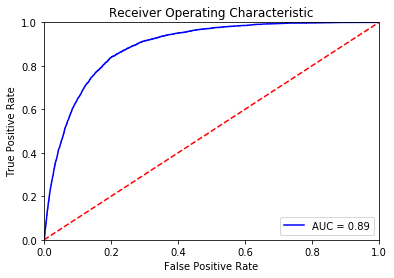

In [141]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
